# Ntbk 14: Random Forests

A random forest is many trees.  Each tree is defined on a subsample of the training data, that's the random part of this. This can be changed, but the subsample that each individual tree is based on is usually a bootstrap.   

The term "black box" in statistics refers to any type of machine-learning where the input and output are visible but the inner workings are a mystery to the user.  The term doesn't quite apply to random forests, but it's close.  That is because we use A LOT of trees, so we rarely examine them individually, and almost exclusively focus on the overall predictions.  I'll explain.  The final prediction of a forest is the average or consensus of the majority of the trees in that forest.  Again, I'll explain but you're all pretty sharp, so once we see an example I bet you'll get most of it.  


This notebook is less complete than most, because I didn't know for sure if we'd reach this topic.  


In [97]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import scipy.stats as stats

import scipy

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=np.VisibleDeprecationWarning)


In [98]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn import tree

#import graphviz

def TwoWaySummary(x):
    """ x must be a 2x2 table arranged T+ F-, F+ T-"""
    a = x[[0],[0]][0]
    b = x[[0],[1]][0]
    c = x[[1],[0]][0]
    d = x[[1],[1]][0]
    
    print(f"sensitivity = {a/(a+c)}\nspecificity = {d/(b+d)}\nrelative risk = {a*(c+d)/(c*(a+b))}\naccuracy = {(a+d)/(a+d+c+b)}")
    

In [99]:
mush_train = pd.read_csv("mushrooms_train.csv")

mush_train

mush_test = pd.read_csv("mushrooms_test.csv")

mush_test


,Unnamed: 0,Poisonous,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,...,Stalk surface below ring,Stalk color above ring,Stalk color below ring,Veil type,Veil color,Ring number,Ring type,Spore print color,Population,Habit
0,0,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,6,e,b,s,w,t,a,f,c,b,...,s,w,w,p,w,o,p,k,n,m
2,8,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,v,g
3,9,e,b,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,k,s,m
4,10,e,x,y,y,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3630,8109,e,b,s,w,f,n,f,w,b,...,s,w,w,p,w,t,p,w,n,g
3631,8113,p,k,y,e,f,y,f,c,n,...,k,p,p,p,w,o,e,w,v,d
3632,8115,e,x,s,n,f,n,a,c,b,...,s,o,o,p,o,o,p,o,v,l
3633,8117,p,k,s,e,f,y,f,c,n,...,s,p,w,p,w,o,e,w,v,d


In [100]:
x_train=mush_train[["GillAttachment", "Bruises", "Stalk Shape"]]


## it's smart to make the test data sets now, when we have the relevant variables in front of our eyes
x_test = mush_test[["GillAttachment", "Bruises", "Stalk Shape"]]

X_train = pd.get_dummies(x_train, drop_first = True)

X_test = pd.get_dummies(x_test, drop_first = True)

y_train =mush_train["Poisonous"]

y_test = mush_test["Poisonous"]


features = np.array(["Gill Detached", "Bruised", "Stalk Shape"])
targets= ["Edible", "Poisonous"]



forest = RandomForestClassifier()

forest.fit(X_train, y_train)

RandomForestClassifier()

In [101]:
forest.estimators_[1]

DecisionTreeClassifier(max_features='auto', random_state=1344602033)

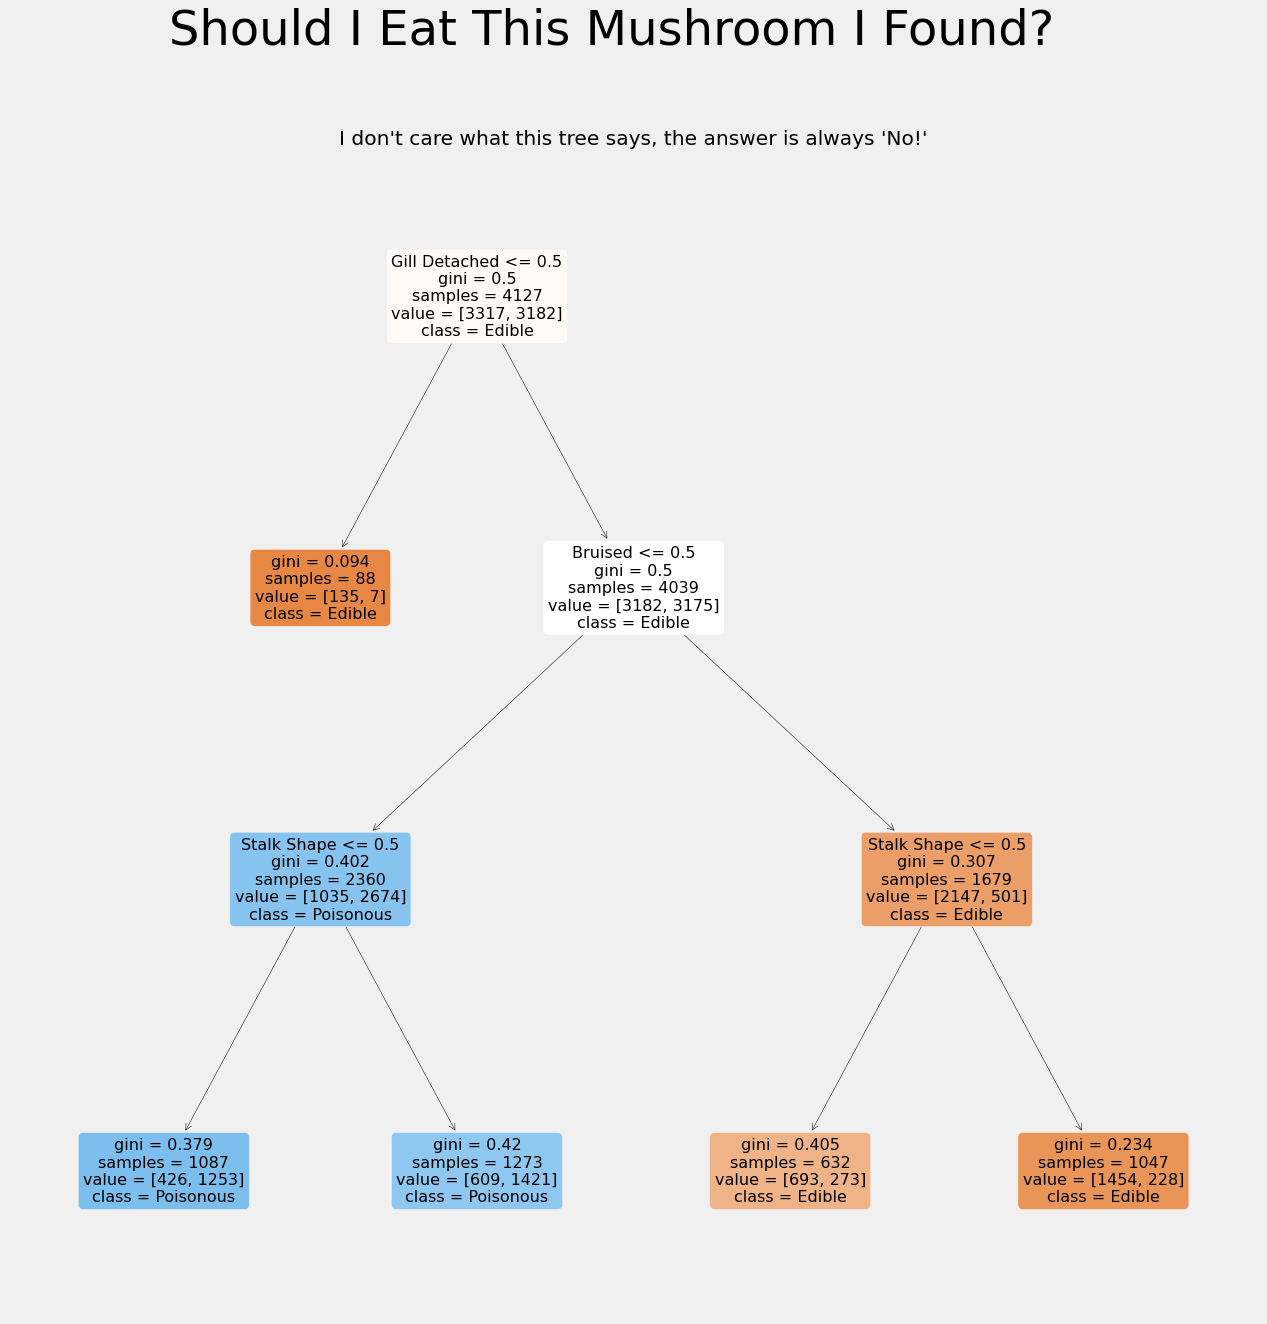

In [102]:
mush_tree_fit = forest.estimators_[1]

plots.figure(figsize = (20,20))
tree.plot_tree(mush_tree_fit, fontsize = 16,rounded = True , filled = True, class_names = targets, feature_names= features, label ="all");
plots.suptitle("Should I Eat This Mushroom I Found?", size=48)
plots.title("I don't care what this tree says, the answer is always 'No!'");

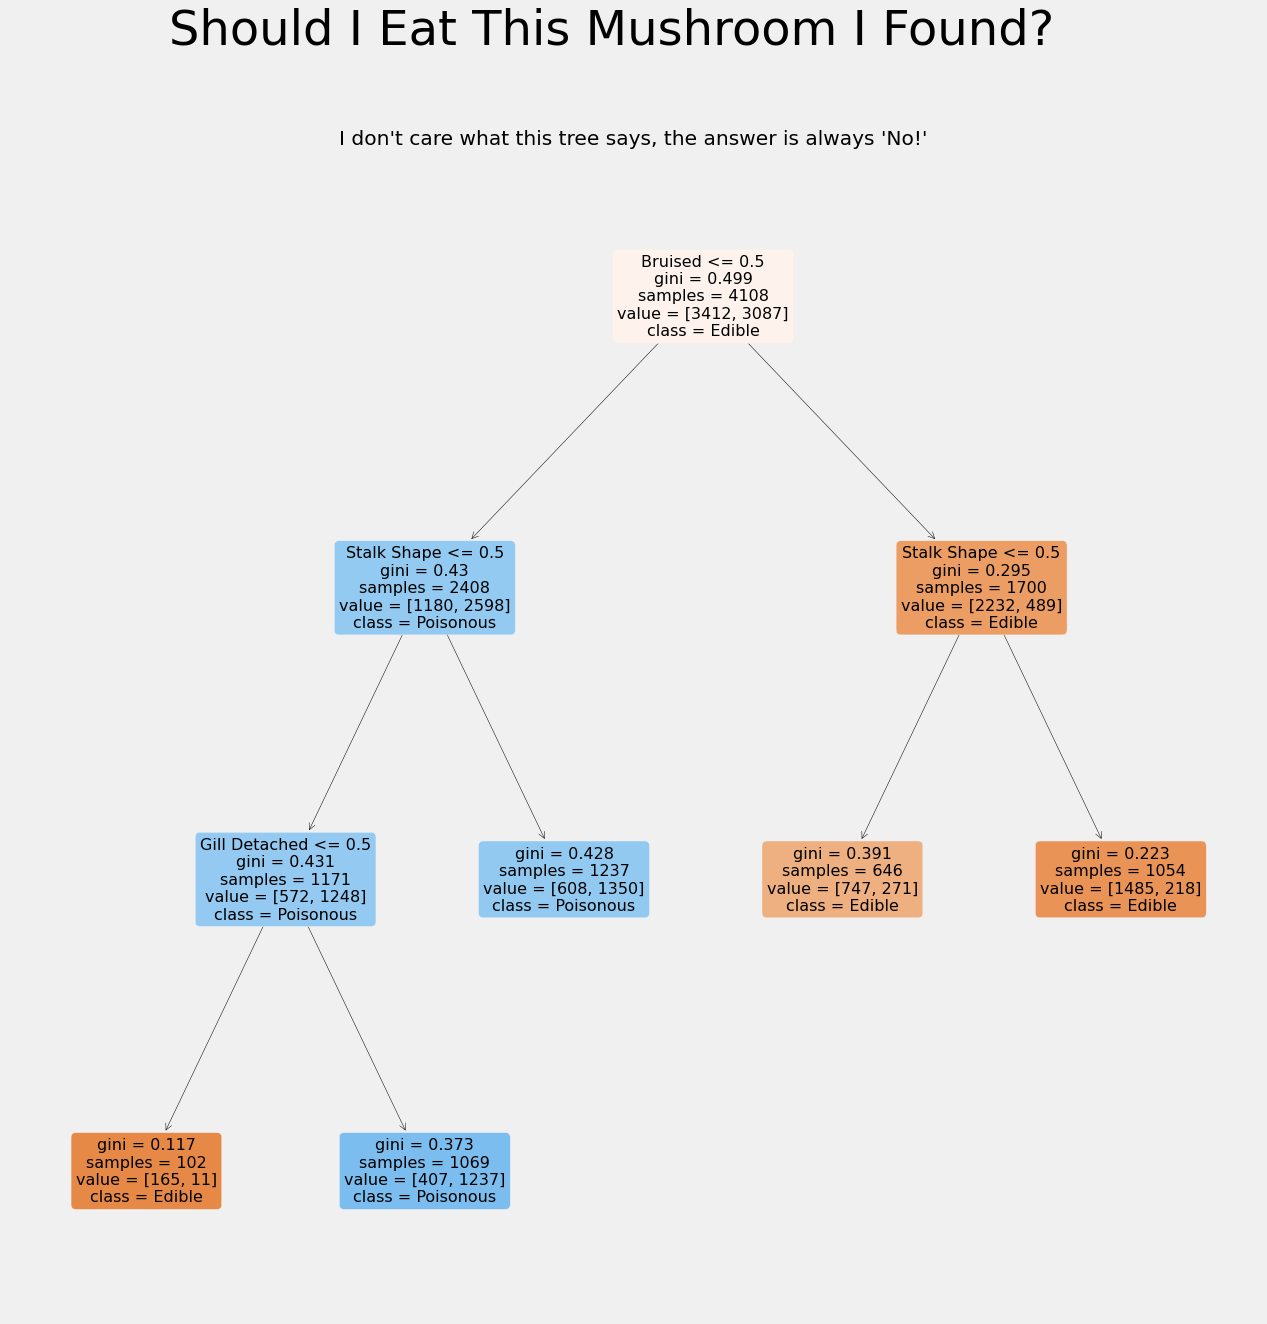

In [103]:
mush_tree_fit = forest.estimators_[2]

plots.figure(figsize = (20,20))
tree.plot_tree(mush_tree_fit, fontsize = 16,rounded = True , filled = True, class_names = targets, feature_names= features, label ="all");
plots.suptitle("Should I Eat This Mushroom I Found?", size=48)
plots.title("I don't care what this tree says, the answer is always 'No!'");

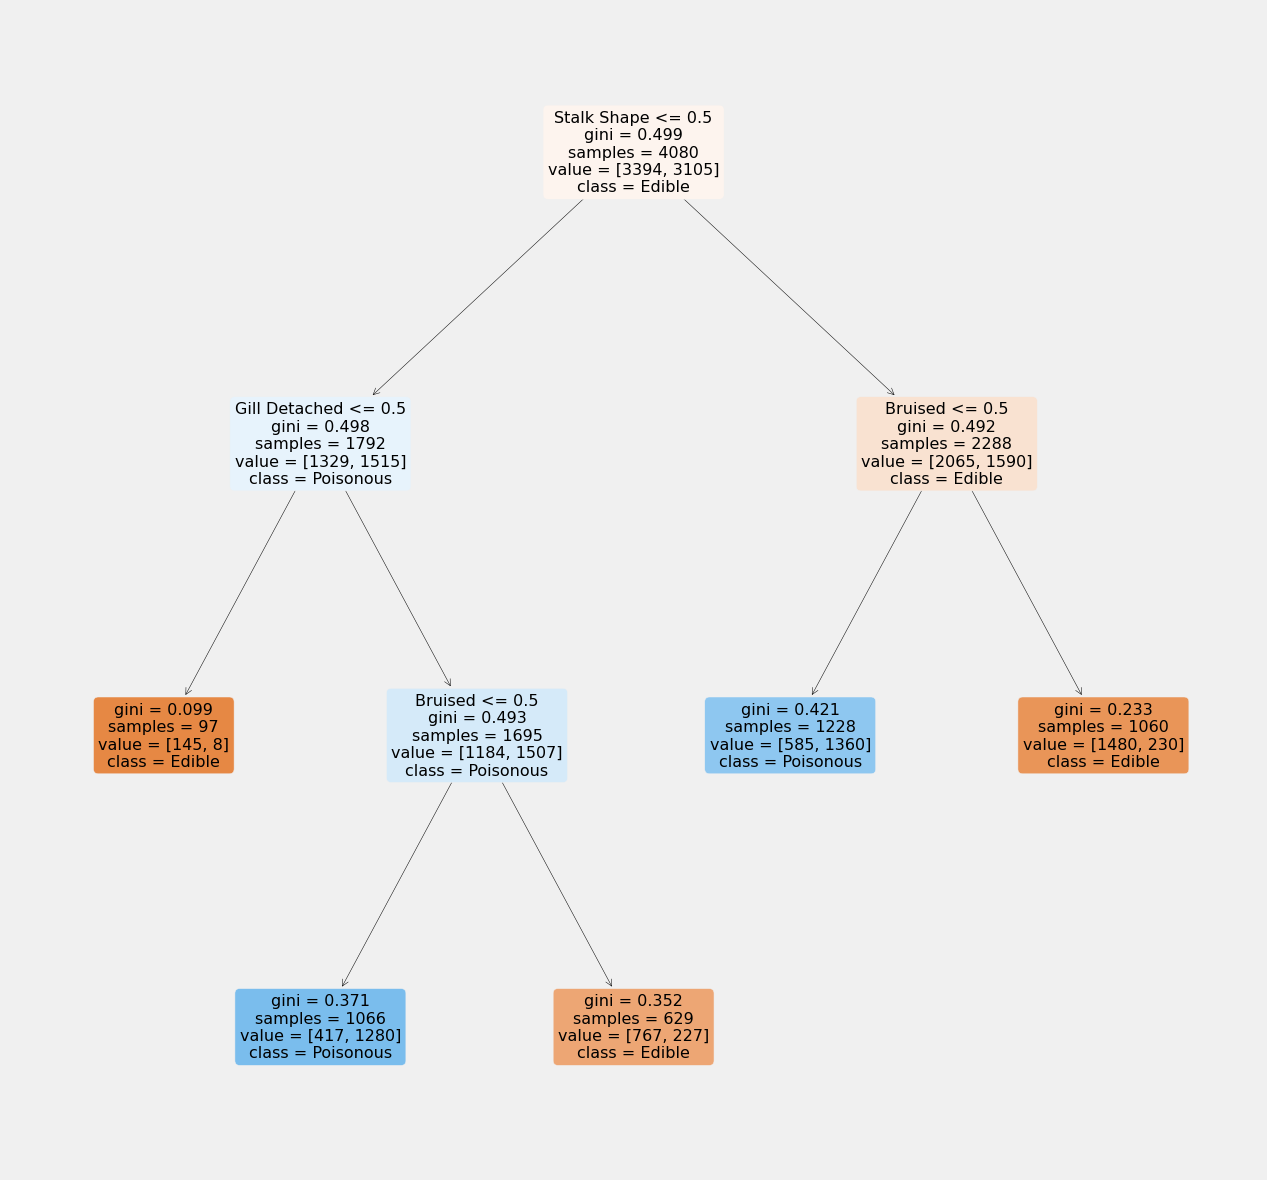

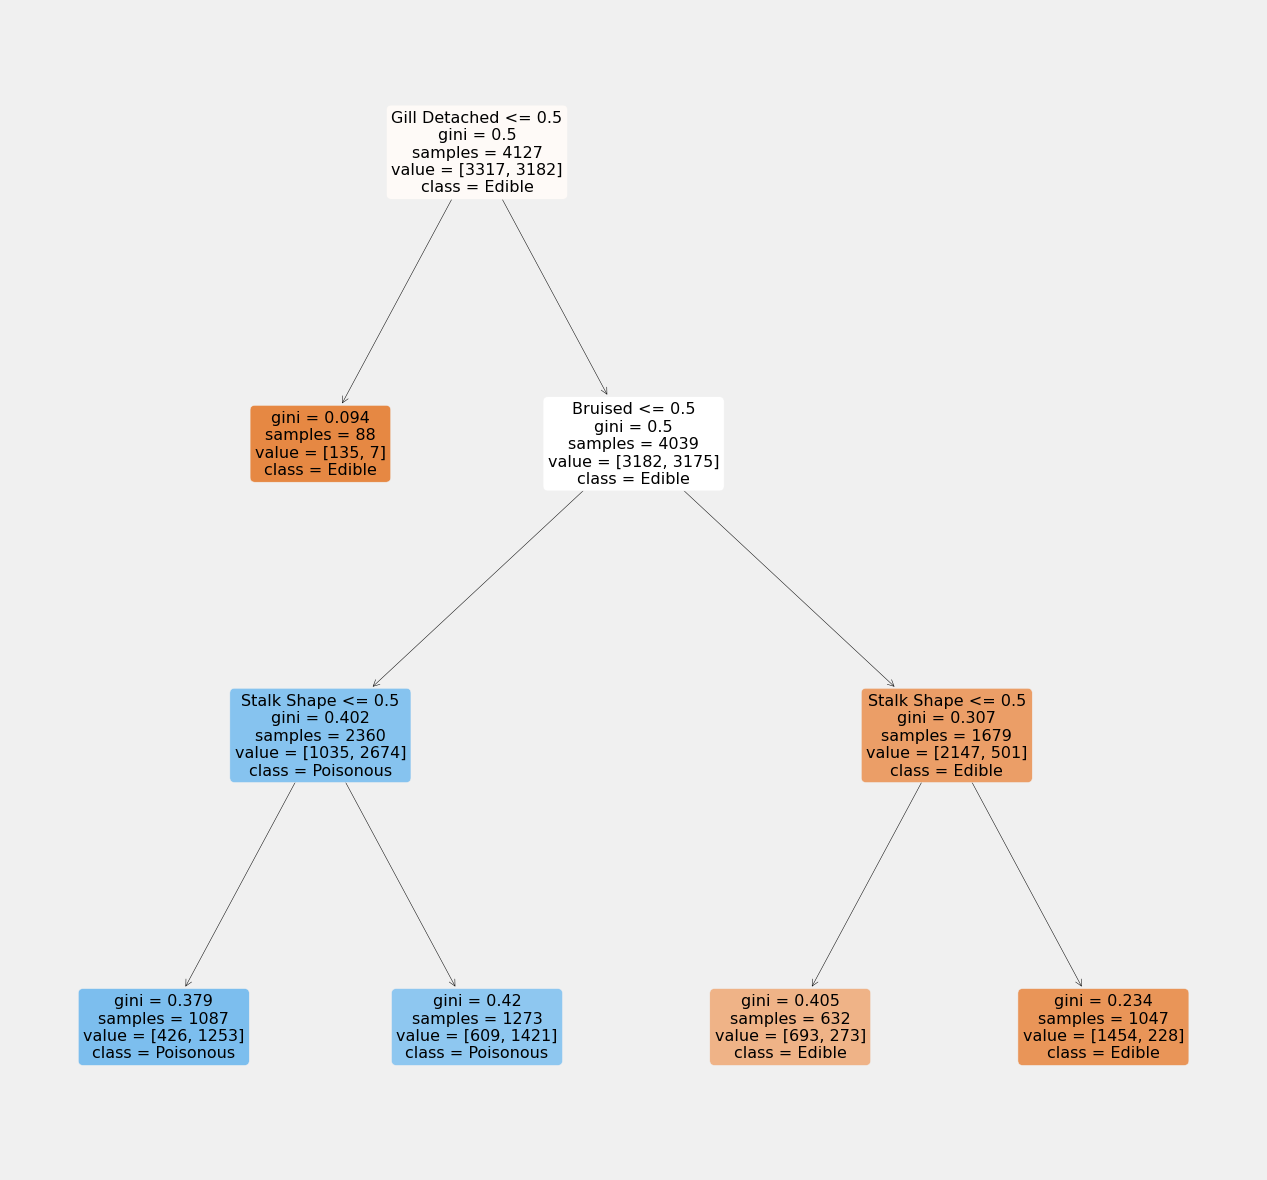

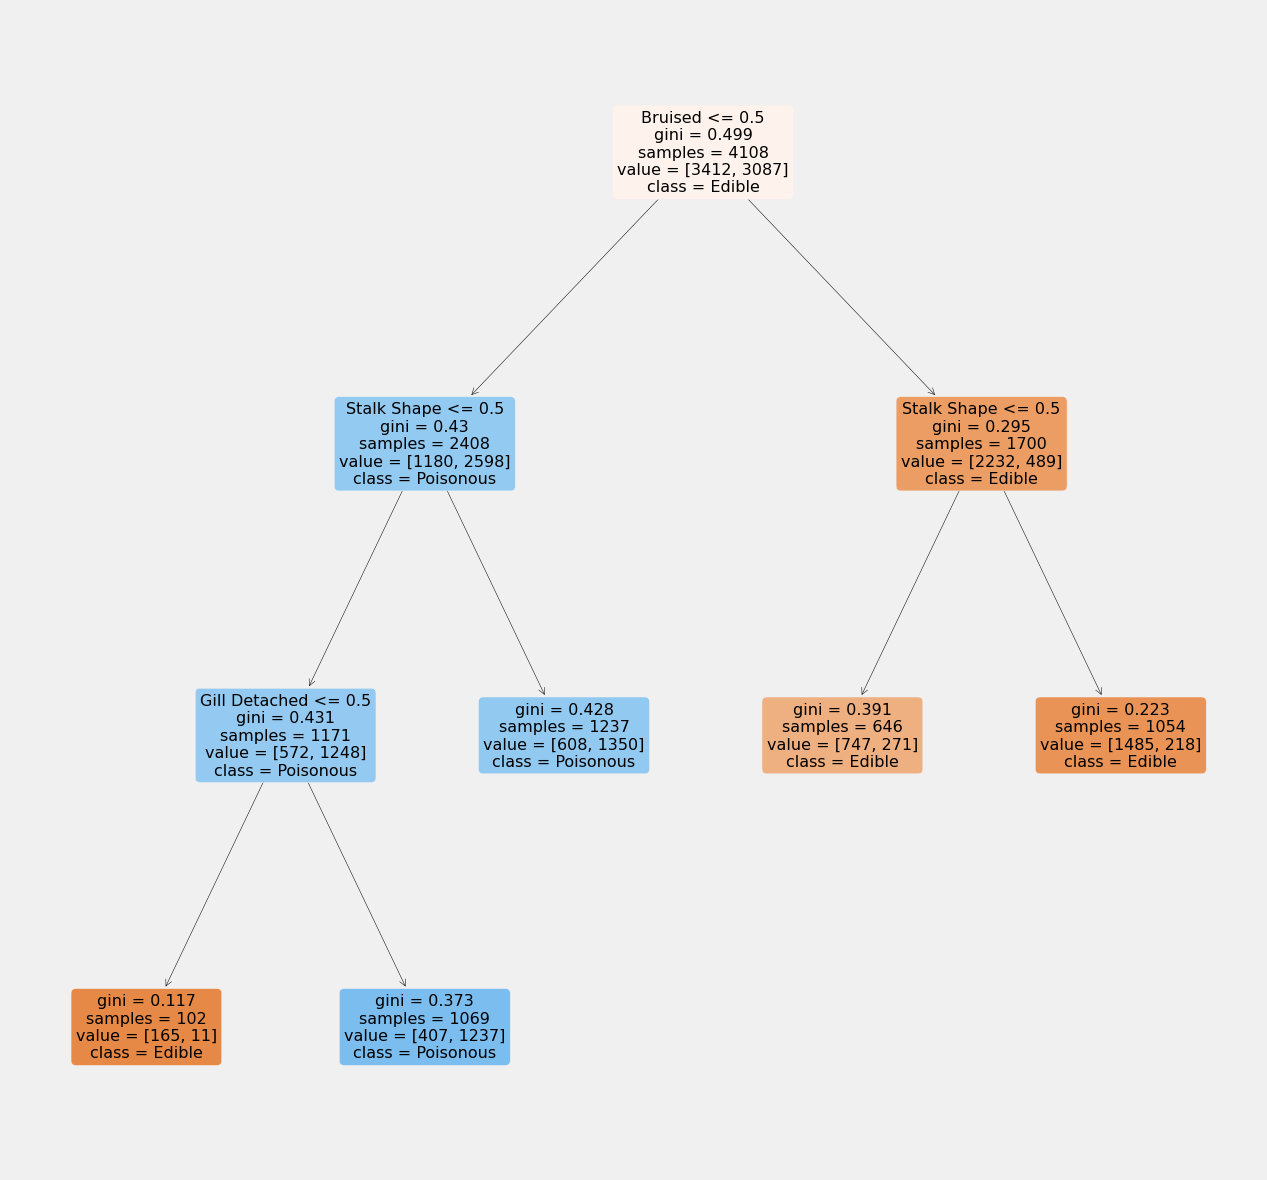

In [104]:
for i in np.arange(3): 
    mush_tree_fit = forest.estimators_[i]

    plots.figure(figsize = (20,20))
    tree.plot_tree(mush_tree_fit, fontsize = 16,rounded = True , filled = True, class_names = targets, feature_names= features, label ="all");
    #plots.suptitle("Should I Eat This Mushroom I Found?", size=48)
    #plots.title("I don't care what this tree says, the answer is always 'No!'");

In [105]:
y_pred = forest.predict(X_test)
y_pred

array(['e', 'e', 'e', ..., 'e', 'p', 'p'], dtype=object)

In [106]:
accuracy_score(y_test, y_pred)

0.7614855570839064

In [107]:
confusion_matrix(y_test, y_pred)

array([[1315,  563],
       [ 304, 1453]])

In [108]:
TwoWaySummary(confusion_matrix(y_test, y_pred))

sensitivity = 0.8122297714638665
specificity = 0.720734126984127
relative risk = 4.04695469704613
accuracy = 0.7614855570839064


In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       0.81      0.70      0.75      1878
           p       0.72      0.83      0.77      1757

    accuracy                           0.76      3635
   macro avg       0.77      0.76      0.76      3635
weighted avg       0.77      0.76      0.76      3635



# Tuning Hyperparameters

Sounds hard, complicated.  It doesn't have to be.  What are hyperparameters?  The limits, conditions you set on the forest.  The first of which is how many trees will be in the forest, then after we also have the limits that will apply to each tree.

In [110]:

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}


rand_search = RandomizedSearchCV(forest, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)





RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa5138d6340>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa513946970>})

In [111]:
best_forest = rand_search.best_estimator_

best_forest

RandomForestClassifier(max_depth=5, n_estimators=344)

In [112]:
train_pred = best_forest.predict(X_train)

train_pred

array(['p', 'e', 'e', ..., 'p', 'p', 'p'], dtype=object)

In [113]:
confusion_matrix(y_train, train_pred)

array([[2336, 1025],
       [ 490, 2648]])

In [114]:
test_pred = best_forest.predict(X_test)

test_pred

array(['e', 'e', 'e', ..., 'e', 'p', 'p'], dtype=object)

In [115]:
confusion_matrix(y_test, test_pred)

array([[1315,  563],
       [ 304, 1453]])

In [116]:
TwoWaySummary(confusion_matrix(y_test, test_pred))

sensitivity = 0.8122297714638665
specificity = 0.720734126984127
relative risk = 4.04695469704613
accuracy = 0.7614855570839064


What parameters or hyperparameters are available to tune? Check the help file.  

In [117]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [118]:
x_train_full = mush_train[mush_train.columns[2:]]

x_train_full

X_train_full = pd.get_dummies(x_train_full, drop_first = True)

x_test_full = mush_test[mush_test.columns[2:]]

X_test_full = pd.get_dummies(x_test_full, drop_first = True)


X_train_full

,CapShape_c,CapShape_f,CapShape_k,CapShape_s,CapShape_x,CapSurface_g,CapSurface_s,CapSurface_y,CapColor_c,CapColor_e,...,Population_n,Population_s,Population_v,Population_y,Habit_g,Habit_l,Habit_m,Habit_p,Habit_u,Habit_w
0,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6495,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6496,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6497,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [119]:
forest.fit(X_train_full, y_train)

RandomForestClassifier()

In [120]:
y_pred_full_train = forest.predict(X_train_full)

confusion_matrix(y_pred_full_train, y_train)

array([[3361,    0],
       [   0, 3138]])

In [121]:
y_pred_full_test = forest.predict(X_test_full)

confusion_matrix(y_pred_full_test, y_test)

array([[1878,    0],
       [   0, 1757]])

In [122]:
param_dist = {'n_estimators': randint(50,500),
              'min_samples_leaf': randint(1,20)}


rand_search = RandomizedSearchCV(forest, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train_full, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa5138ea430>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa51392e3d0>})

In [123]:
best_forest = rand_search.best_estimator_

best_forest.predict(X_train_full)

array(['p', 'e', 'e', ..., 'p', 'p', 'p'], dtype=object)

In [124]:
confusion_matrix(best_forest.predict(X_train_full), y_train)

array([[3361,    4],
       [   0, 3134]])

In [125]:
confusion_matrix(best_forest.predict(X_test_full), y_test)

array([[1878,    5],
       [   0, 1752]])

In [130]:
div_test = pd.read_csv("divorce_test.csv")

div_train = pd.read_csv("divorce_train.csv")

div_train

,Unnamed: 0,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,106,0,0,0,0,0,0,0,0,0,...,3,1,3,1,3,3,3,1,0,0
1,152,1,0,0,0,0,1,0,0,0,...,2,1,2,1,2,2,4,2,0,0
2,131,0,1,1,1,0,0,0,0,0,...,3,0,2,2,2,2,0,0,0,0
3,0,2,2,4,1,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
4,21,4,3,3,3,4,1,0,3,3,...,4,4,4,4,4,4,4,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,44,4,2,3,2,4,2,0,2,3,...,4,4,4,4,4,4,4,4,4,1
132,71,2,2,3,2,2,2,2,2,3,...,4,4,4,4,4,4,4,4,4,1
133,92,1,1,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,1,1,0
134,36,4,3,3,3,4,1,0,3,3,...,4,3,4,4,3,3,4,4,3,1


In [131]:
x_div_train = div_train[div_train.columns[1:55]]

x_div_train

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,0,0,0,0,0,0,0,0,0,0,...,4,3,1,3,1,3,3,3,1,0
1,1,0,0,0,0,1,0,0,0,1,...,0,2,1,2,1,2,2,4,2,0
2,0,1,1,1,0,0,0,0,0,0,...,1,3,0,2,2,2,2,0,0,0
3,2,2,4,1,0,0,0,0,0,0,...,3,2,1,3,3,3,2,3,2,1
4,4,3,3,3,4,1,0,3,3,3,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,4,2,3,2,4,2,0,2,3,2,...,4,4,4,4,4,4,4,4,4,4
132,2,2,3,2,2,2,2,2,3,2,...,4,4,4,4,4,4,4,4,4,4
133,1,1,0,0,0,0,0,0,0,1,...,2,1,0,0,1,1,1,1,1,1
134,4,3,3,3,4,1,0,3,3,3,...,4,4,3,4,4,3,3,4,4,3


In [127]:
y_div_train = div_train[div_train.columns[55]]
y_div_train

0      0
1      0
2      0
3      1
4      1
      ..
131    1
132    1
133    0
134    1
135    0
Name: Class, Length: 136, dtype: int64

In [128]:
x_div_test = div_test[div_test.columns[1:55]]

y_div_test = div_test[div_test.columns[55]]

Reference for this notebook (https://www.datacamp.com/tutorial/random-forests-classifier-python)

In [133]:
div_forest = RandomForestClassifier()

div_forest.fit(x_div_train, y_div_train)

RandomForestClassifier()

In [134]:
div_forest.predict(x_div_train)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0])

In [135]:
confusion_matrix(div_forest.predict(x_div_train), y_div_train)

array([[69,  0],
       [ 0, 67]])

In [136]:
confusion_matrix(div_forest.predict(x_div_test), y_div_test)

array([[39,  2],
       [ 0, 40]])

In [137]:
TwoWaySummary(confusion_matrix(div_forest.predict(x_div_test), y_div_test))

sensitivity = 1.0
specificity = 0.9523809523809523
relative risk = inf
accuracy = 0.9753086419753086


<ipython-input-98-c8fbbcfef381>:25: RuntimeWarning: divide by zero encountered in long_scalars
  print(f"sensitivity = {a/(a+c)}\nspecificity = {d/(b+d)}\nrelative risk = {a*(c+d)/(c*(a+b))}\naccuracy = {(a+d)/(a+d+c+b)}")


# Variable Importance

Sometimes, the reason to run a logistic regression, decision tree or random forest analysis is to figure out which, if any, variables are important predictors.  

With logistic regression, we talked about that already, just look for the lowest p-values to see which variables are the most important.  How do we do the same for trees or forests.  In particular, what are the most important predictors of divorce?  Use feature importance to look at that.

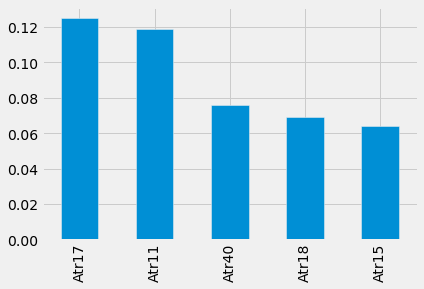

In [138]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(div_forest.feature_importances_, index=x_div_train.columns).sort_values(ascending=False)[0:5]

# Plot a simple bar chart
feature_importances.plot.bar();

In [139]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}


rand_search = RandomizedSearchCV(forest, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_div_train, y_div_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa5139bad00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa513891d00>})

In [140]:
best_div_forest = rand_search.best_estimator_


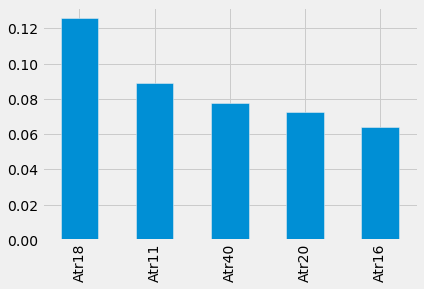

In [141]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_div_forest.feature_importances_, index=x_div_train.columns).sort_values(ascending=False)[0:5]

# Plot a simple bar chart
feature_importances.plot.bar();

In [144]:
TwoWaySummary(confusion_matrix(best_div_forest.predict(x_div_train), y_div_train))

sensitivity = 1.0
specificity = 1.0
relative risk = inf
accuracy = 1.0


<ipython-input-98-c8fbbcfef381>:25: RuntimeWarning: divide by zero encountered in long_scalars
  print(f"sensitivity = {a/(a+c)}\nspecificity = {d/(b+d)}\nrelative risk = {a*(c+d)/(c*(a+b))}\naccuracy = {(a+d)/(a+d+c+b)}")


In [145]:
TwoWaySummary(confusion_matrix(best_div_forest.predict(x_div_test), y_div_test))

sensitivity = 1.0
specificity = 0.9523809523809523
relative risk = inf
accuracy = 0.9753086419753086


<ipython-input-98-c8fbbcfef381>:25: RuntimeWarning: divide by zero encountered in long_scalars
  print(f"sensitivity = {a/(a+c)}\nspecificity = {d/(b+d)}\nrelative risk = {a*(c+d)/(c*(a+b))}\naccuracy = {(a+d)/(a+d+c+b)}")


## Back to Mushrooms


So, what were the most imporant predictors of a mushroom being poisonous?

Recall, our first examples used the mushroom data.  The forest was just called forest and the best forest was just best_forest.  


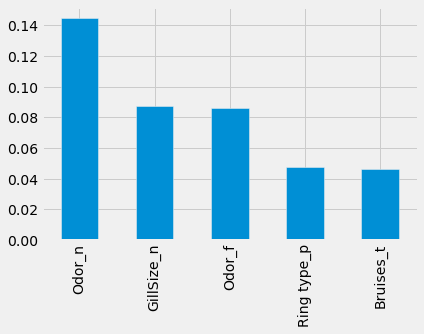

In [149]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(forest.feature_importances_, index=X_train_full.columns).sort_values(ascending=False)[0:5]

# Plot a simple bar chart
feature_importances.plot.bar();

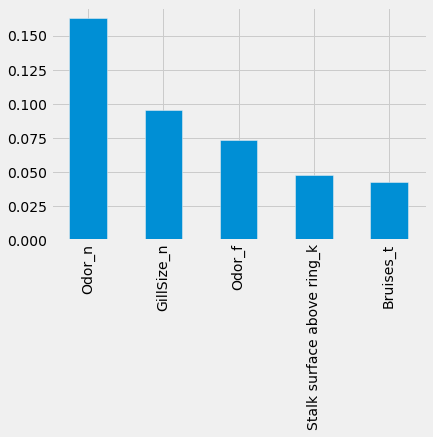

In [151]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_forest.feature_importances_, index=X_train_full.columns).sort_values(ascending=False)[0:5]

# Plot a simple bar chart
feature_importances.plot.bar();